In [2]:
# import libararies
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np

image_array = imread("apple.jpg")
# print(image_array)
print(image_array.shape)

(650, 500, 3)


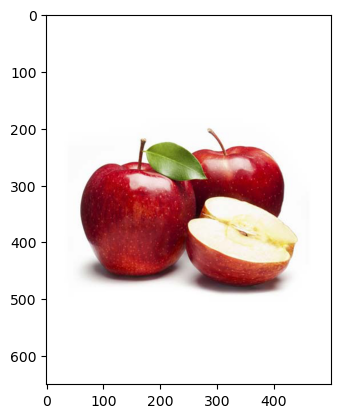

In [3]:
plt.imshow(image_array)

In [4]:
# convert 3d to 2d
image_array_2d = image_array.reshape(-1, 3)

print("Original shape:", image_array.shape)
print("Shape after converting to 2D:", image_array_2d.shape)
print(image_array_2d.ndim)
print(image_array_2d)

Original shape: (650, 500, 3)
Shape after converting to 2D: (325000, 3)
2
[[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [255 255 255]
 [255 255 255]
 [255 255 255]]


In [5]:
# initialize centroids
rgb_data = image_array_2d
num_centroids = 3  
num_pixels = rgb_data.shape[0]
centroid_indices = np.random.choice(num_pixels, num_centroids, replace=False)
centroids = rgb_data[centroid_indices]
print("Randomly selected centroids:")
print(centroids)


Randomly selected centroids:
[[153  32  39]
 [ 96  52  39]
 [255 255 255]]


In [6]:
absolute_diff = np.abs(image_array_2d[:, np.newaxis, :] - centroids)

# Sum the absolute differences along the RGB axis
distances = np.sum(absolute_diff, axis=2)

# Print the distances
print("Distances to centroids:")
print(distances)

Distances to centroids:
[[541 578   0]
 [541 578   0]
 [541 578   0]
 ...
 [541 578   0]
 [541 578   0]
 [541 578   0]]


In [7]:
closest_centroids_indices = np.argmin(distances, axis=1)

# Map the indices to the rows of the centroids array
clusters = closest_centroids_indices + 1  # Adding 1 to make clusters start from 1

# Print the assigned clusters
print("Assigned clusters:")
print(clusters)
# clusters.shape

Assigned clusters:
[3 3 3 ... 3 3 3]


In [8]:
# update centroids
for i in range(20):
    updated_centroids = np.zeros_like(centroids)
    for cluster in np.unique(clusters):
        cluster_indices = np.where(clusters == cluster)[0]
        cluster_rgb_values = rgb_data[cluster_indices]
        mean_rgb_values = np.mean(cluster_rgb_values, axis=0) 
        updated_centroids[cluster - 1] = mean_rgb_values
    
    absolute_diff = np.abs(image_array_2d[:, np.newaxis, :] - updated_centroids)
    distances = np.sum(absolute_diff, axis=2)
    closest_centroids_indices = np.argmin(distances, axis=1)
    clusters = closest_centroids_indices + 1 
    
#     print("Iteration:", i+1)
#     print("Assigned clusters:")
#     print(clusters)
#     print("Distances to centroids:")
#     print(distances)
print("Updated centroids:")
print(updated_centroids)


Updated centroids:
[[227 212 190]
 [237 225 201]
 [232 213 211]]


In [9]:
array_d = updated_centroids[clusters - 1]


# Print the updated array_2d
print("Updated array_3d:")
print(array_d)
print(array_d.dtype)

Updated array_3d:
[[237 225 201]
 [237 225 201]
 [237 225 201]
 ...
 [237 225 201]
 [237 225 201]
 [237 225 201]]
uint8


In [10]:
array_3d = array_d.reshape(image_array.shape)
# ensure datatype
rray_3d = np.uint8(array_3d)

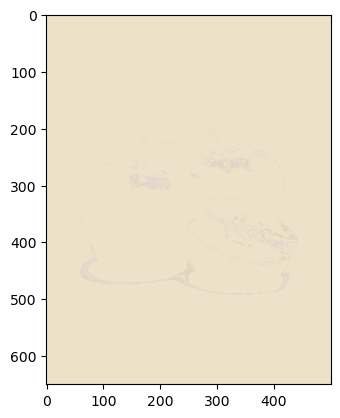

In [12]:
plt.imshow(array_3d)
plt.show()

for k =10

In [13]:
rgb_data = image_array_2d
num_centroids = 10
num_pixels = rgb_data.shape[0]
centroid_indices = np.random.choice(num_pixels, num_centroids, replace=False)
centroids = rgb_data[centroid_indices]
print("Randomly selected centroids:")
print(centroids)

Randomly selected centroids:
[[255 255 255]
 [146  44  57]
 [255 255 255]
 [255 255 255]
 [ 96   6   6]
 [255 255 255]
 [154  35  37]
 [255 255 255]
 [251 251 251]
 [255 255 255]]


In [14]:
# Calculate absolute differences between image_array_2d and centroids
absolute_diff = np.abs(image_array_2d[:, np.newaxis, :] - centroids)

# Sum the absolute differences along the RGB axis
distances = np.sum(absolute_diff, axis=2)

# Print the distances
print("Distances to centroids:")
print(distances)


Distances to centroids:
[[  0 518   0 ...   0  12   0]
 [  0 518   0 ...   0  12   0]
 [  0 518   0 ...   0  12   0]
 ...
 [  0 518   0 ...   0  12   0]
 [  0 518   0 ...   0  12   0]
 [  0 518   0 ...   0  12   0]]


In [15]:
# Find the index of the smallest value in each row of the distances array
closest_centroids_indices = np.argmin(distances, axis=1)

# Map the indices to the rows of the centroids array
clusters = closest_centroids_indices + 1  # Adding 1 to make clusters start from 1

# Print the assigned clusters
print("Assigned clusters:")
print(clusters)
# clusters.shape

Assigned clusters:
[1 1 1 ... 1 1 1]


In [16]:
# update centroids
for i in range(20):
    updated_centroids = np.zeros((10, image_array_2d.shape[1])) # Adjusted for 10 centroids
    for cluster in np.unique(clusters):
        cluster_indices = np.where(clusters == cluster)[0]
        cluster_data = image_array_2d[cluster_indices]
        mean_data = np.mean(cluster_data, axis=0) 
        updated_centroids[cluster - 1] = mean_data
    
    absolute_diff = np.abs(image_array_2d[:, np.newaxis, :] - updated_centroids)
    distances = np.sum(absolute_diff, axis=2)
    closest_centroids_indices = np.argmin(distances, axis=1)
    clusters = closest_centroids_indices + 1 
    
#     print("Iteration:", i+1)
#     print("Assigned clusters:")
#     print(clusters)
#     print("Distances to centroids:")
#     print(distances)
print("Updated centroids:")
print(updated_centroids)

Updated centroids:
[[237.11112028 223.12705358 197.10806571]
 [195.75713066 164.92775406 144.95695986]
 [150.05155884  14.29704839  24.50607685]
 [131.75541866 136.65023956  72.19712526]
 [169.00227594  39.99819495  44.57973631]
 [111.45916005   9.14426257  20.82705026]
 [201.05880632  85.14613809  74.41471621]
 [ 96.57117256  66.81925243  54.6047107 ]
 [254.41330328 254.26766579 253.83167169]
 [ 74.41029083  15.42863535  21.9114094 ]]


In [17]:
array_d = updated_centroids[clusters - 1]


# Print the updated array_2d
print("Updated array_3d:")
print(array_d)

Updated array_3d:
[[254.41330328 254.26766579 253.83167169]
 [254.41330328 254.26766579 253.83167169]
 [254.41330328 254.26766579 253.83167169]
 ...
 [254.41330328 254.26766579 253.83167169]
 [254.41330328 254.26766579 253.83167169]
 [254.41330328 254.26766579 253.83167169]]


In [18]:
array_3d = array_d.reshape(image_array.shape)
array_3d = np.uint8(array_3d)

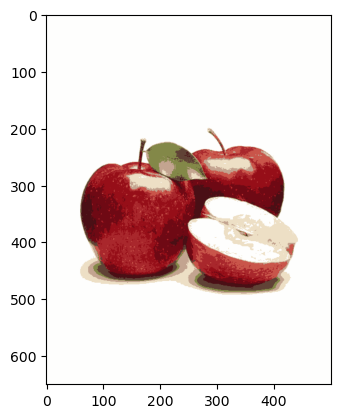

In [19]:
plt.imshow(array_3d)
plt.show()

for k = 20

In [20]:
rgb_data = image_array_2d
num_centroids = 20
num_pixels = rgb_data.shape[0]
centroid_indices = np.random.choice(num_pixels, num_centroids, replace=False)
centroids = rgb_data[centroid_indices]
print("Randomly selected centroids:")
print(centroids)

Randomly selected centroids:
[[255 255 255]
 [255 255 255]
 [255 255 255]
 [253 253 253]
 [255 255 255]
 [140  26  34]
 [213  56  83]
 [247 245 233]
 [109  10  28]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [253 253 253]
 [255 255 255]
 [173   6  26]
 [175  26  32]
 [255 255 255]
 [255 255 255]
 [179  81  70]
 [255 255 255]]


In [21]:
absolute_diff = np.abs(image_array_2d[:, np.newaxis, :] - centroids)

# Sum the absolute differences along the RGB axis
distances = np.sum(absolute_diff, axis=2)

# Print the distances
print("Distances to centroids:")
print(distances)

Distances to centroids:
[[  0   0   0 ...   0 435   0]
 [  0   0   0 ...   0 435   0]
 [  0   0   0 ...   0 435   0]
 ...
 [  0   0   0 ...   0 435   0]
 [  0   0   0 ...   0 435   0]
 [  0   0   0 ...   0 435   0]]


In [22]:
closest_centroids_indices = np.argmin(distances, axis=1)

# Map the indices to the rows of the centroids array
clusters = closest_centroids_indices + 1  # Adding 1 to make clusters start from 1

# Print the assigned clusters
print("Assigned clusters:")
print(clusters)
# clusters.shape

Assigned clusters:
[1 1 1 ... 1 1 1]


In [23]:
# to update centriods
for i in range(20):
    updated_centroids = np.zeros((20, image_array_2d.shape[1])) # Adjusted for 20 centroids
    for cluster in np.unique(clusters):
        cluster_indices = np.where(clusters == cluster)[0]
        cluster_data = image_array_2d[cluster_indices]
        mean_data = np.mean(cluster_data, axis=0) 
        updated_centroids[cluster - 1] = mean_data
    
    absolute_diff = np.abs(image_array_2d[:, np.newaxis, :] - updated_centroids)
    distances = np.sum(absolute_diff, axis=2)
    closest_centroids_indices = np.argmin(distances, axis=1)
    clusters = closest_centroids_indices + 1 
    
#     print("Iteration:", i+1)
#     print("Assigned clusters:")
#     print(clusters)
#     print("Distances to centroids:")
#     print(distances)
print("Updated centroids:")
print(updated_centroids)


Updated centroids:
[[235.8318985  214.89533303 176.77797916]
 [127.42151589  87.94865526  88.63814181]
 [122.41244656  11.48712589  22.41947743]
 [254.57339104 254.55605152 254.4657764 ]
 [ 91.01863164  65.82987172  47.58857666]
 [131.17515275 152.07467753  58.06788866]
 [205.1086324  183.58050436 172.4100388 ]
 [246.02011735 239.51009678 221.40097539]
 [155.76721557  14.02806886  24.50149701]
 [ 93.8716707    8.43099274  19.56507264]
 [ 67.51499348  24.08604954  27.70338983]
 [ 51.85637343   3.          10.94254937]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [167.4212963   39.8735119   44.50967262]
 [201.04384878  79.9883793   70.18484661]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [188.85803863 143.88211688 125.14472034]
 [  0.           0.           0.        ]]


In [24]:
array_d = updated_centroids[clusters - 1]


# Print the updated array_2d
print("Updated array_3d:")
print(array_d)

Updated array_3d:
[[254.57339104 254.55605152 254.4657764 ]
 [254.57339104 254.55605152 254.4657764 ]
 [254.57339104 254.55605152 254.4657764 ]
 ...
 [254.57339104 254.55605152 254.4657764 ]
 [254.57339104 254.55605152 254.4657764 ]
 [254.57339104 254.55605152 254.4657764 ]]


In [25]:
array_3d = array_d.reshape(image_array.shape)
array_3d = np.uint8(array_3d)

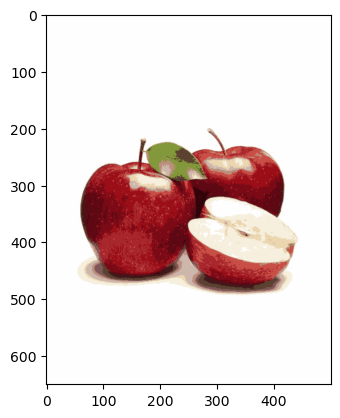

In [26]:
plt.imshow(array_3d)
plt.show()